In [1]:
#Imporet all required 
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [2]:
#import Fraud Loan Prediction data files

df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/Loan_Prediction.csv")

In [3]:
#Checking not null values & data types for all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [7]:
#Checking null value & datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            614 non-null    int64
 1   Gender             614 non-null    int32
 2   Married            614 non-null    int32
 3   Dependents         614 non-null    int64
 4   Education          614 non-null    int32
 5   Self_Employed      614 non-null    int32
 6   ApplicantIncome    614 non-null    int64
 7   CoapplicantIncome  614 non-null    int64
 8   LoanAmount         614 non-null    int64
 9   Loan_Amount_Term   614 non-null    int64
 10  Credit_History     614 non-null    int64
 11  Property_Area      614 non-null    int32
 12  Loan_Status        614 non-null    int32
dtypes: int32(6), int64(7)
memory usage: 48.1 KB


In [8]:
import numpy as np

df['Dependents'].replace(np.NaN,df['Dependents'].mean,inplace=True)
df['LoanAmount'].replace(np.NaN,df['LoanAmount'].mean,inplace=True)
df['Loan_Amount_Term'].replace(np.NaN,df['Loan_Amount_Term'].mean,inplace=True)
df['Credit_History'].replace(np.NaN,df['Credit_History'].mean,inplace=True)

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,224,8,1,2,1
1,1,1,2,1,0,0,306,60,81,8,1,0,0
2,2,1,2,0,0,2,139,0,26,8,1,2,1
3,3,1,2,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


In [10]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609,0,0,0,0,0,125,0,29,8,1,0,1
610,610,1,2,3,0,0,275,0,7,5,1,0,1
611,611,1,2,1,0,0,431,3,162,8,1,2,1
612,612,1,2,2,0,0,422,0,132,8,1,2,1
613,613,0,0,0,0,2,306,0,86,8,0,1,0


In [11]:
# Checking summery statistics for all numeric coluns of train dataset
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,1.301303,1.013029,0.218241,0.319218,247.117264,78.884365,91.444625,7.861564,2.931596,1.037459,0.687296
std,177.390811,0.421752,0.951738,1.990965,0.413389,0.696570,143.537853,92.623999,50.996843,1.828376,8.150614,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,53.250000,8.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,2.000000,0.000000,0.000000,0.000000,244.500000,33.500000,82.000000,8.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,2.000000,2.000000,0.000000,0.000000,369.750000,153.750000,123.000000,8.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,18.000000,1.000000,2.000000,504.000000,286.000000,224.000000,23.000000,51.000000,2.000000,1.000000


# EDA - Analyse the data set stats using plots

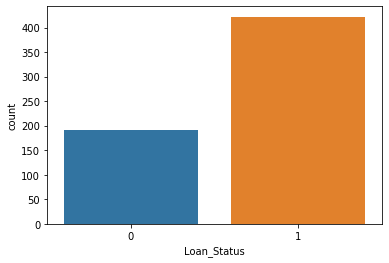

In [12]:
sns.countplot(x='Loan_Status', data=df);

Loan should be given % is more than 50% than lan should not give %

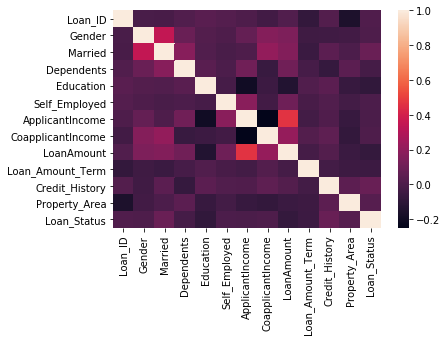

In [13]:
# checking correlation
dfcor=df.corr()
sns.heatmap(dfcor)

Its hows that Gender,Married,Coapplicant Income,Loan Amount are correlated & have impact on target value

In [14]:
# class distribution of target 
print(df.groupby('Loan_Status').size())

Loan_Status
0    192
1    422
dtype: int64


In [15]:
# Checking for skewness for each of the column
df.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.633517
Dependents           4.866992
Education            1.367622
Self_Employed        1.855565
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.626530
Loan_Amount_Term     3.136028
Credit_History       4.186738
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [16]:
# Check for the outliers,apply zscore & remove skewness

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(614, 13)
(564, 13)


In [17]:
# Separating target & input variables
import numpy as np

df_x=df_final.drop(columns=["Loan_Status"])
y=df_final[["Loan_Status"]]

In [18]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [19]:
# lets again check for skewness
x.skew()

Loan_ID             -0.020858
Gender              -0.923102
Married             -0.621655
Dependents           1.015160
Education            1.460251
Self_Employed        1.838220
ApplicantIncome      0.044773
CoapplicantIncome    0.799664
LoanAmount           0.596958
Loan_Amount_Term    -1.954951
Credit_History       5.638100
Property_Area       -0.031338
dtype: float64

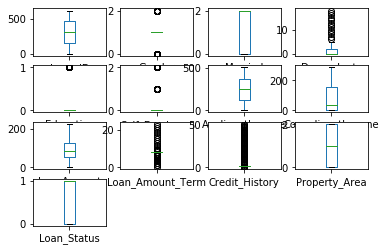

In [20]:
# Visualization - box and whisker plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

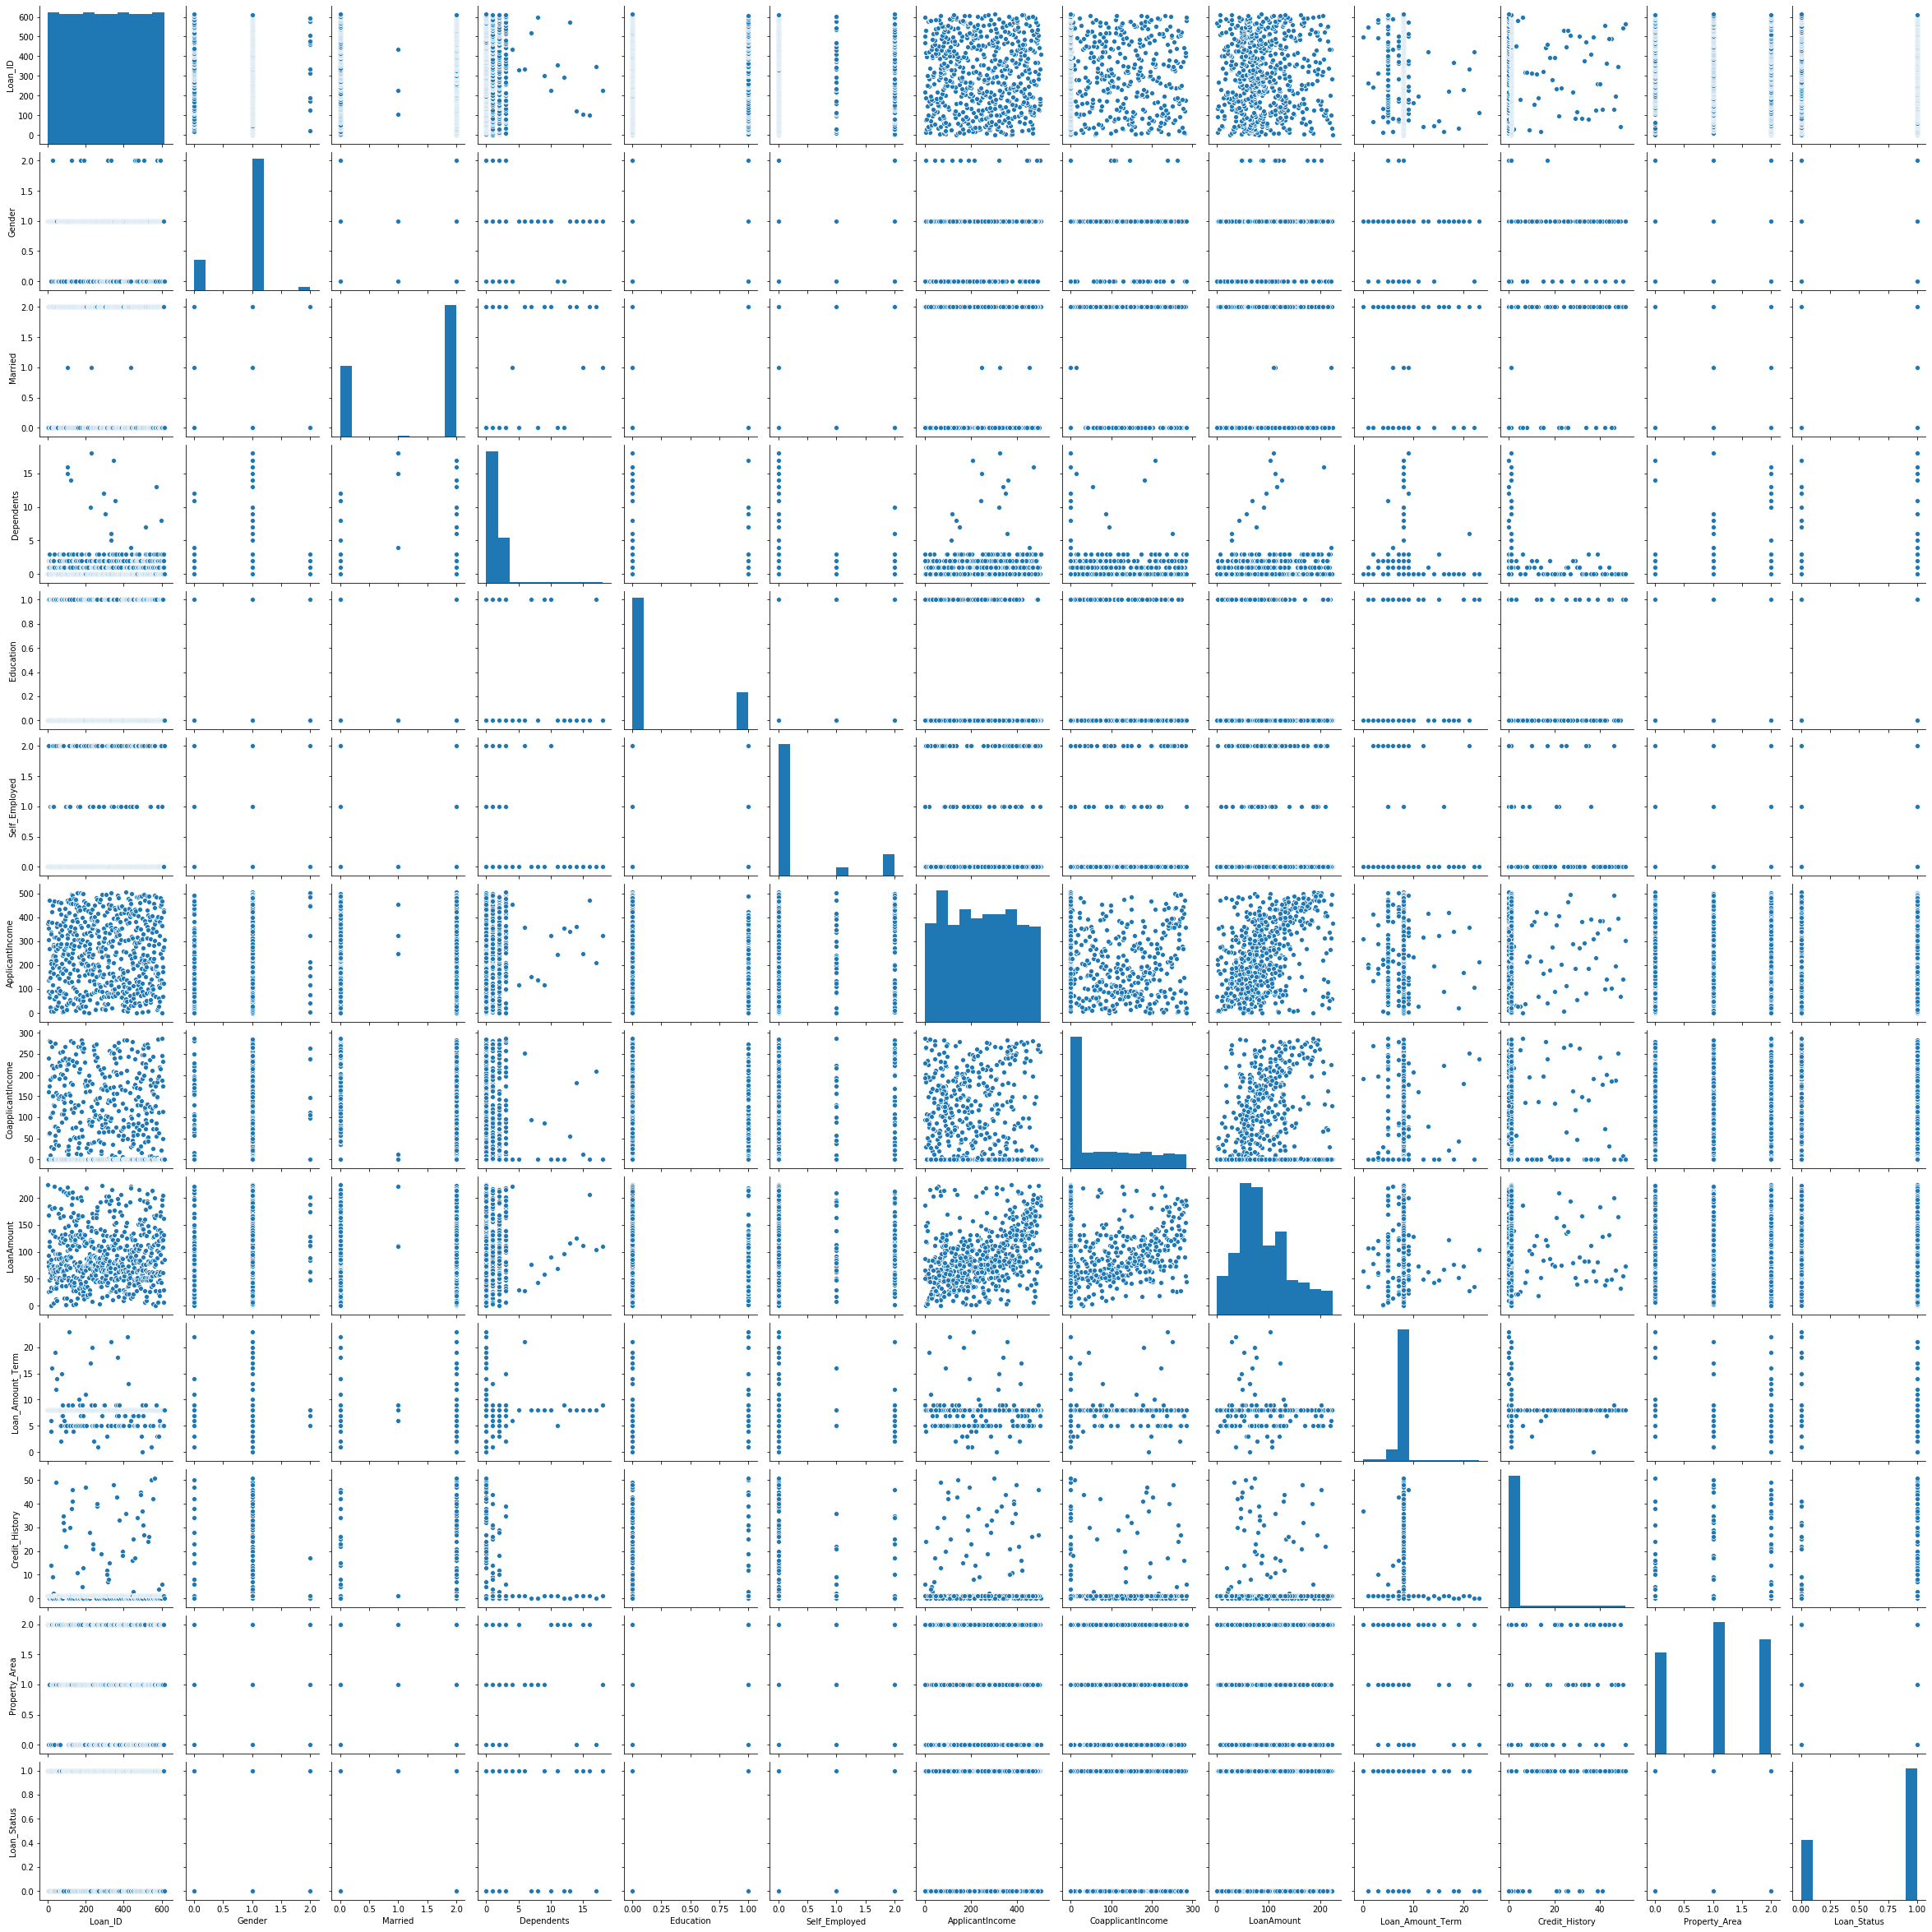

In [21]:
# draw Scatter plot 
sns.pairplot(df)
plt.show()

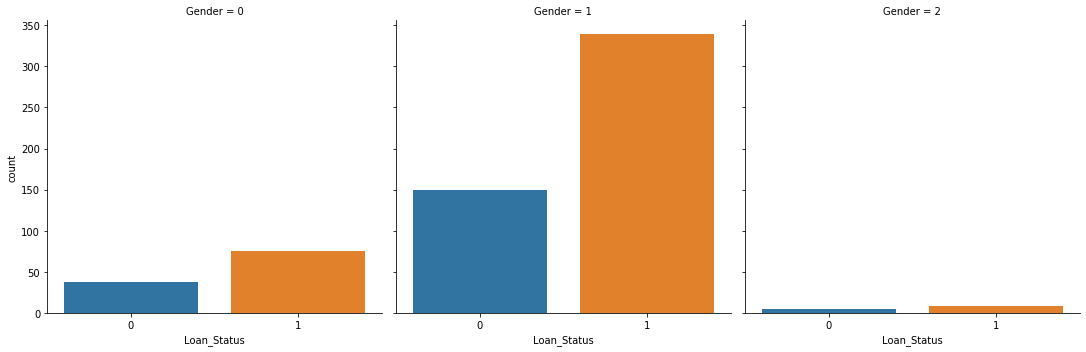

In [22]:
# build bar plots of loan prediction fraud dataset feature 'Loan_Status' splits over the feature 'Gender'
sns.factorplot(x='Loan_Status', col='Gender', kind='count', data=df);

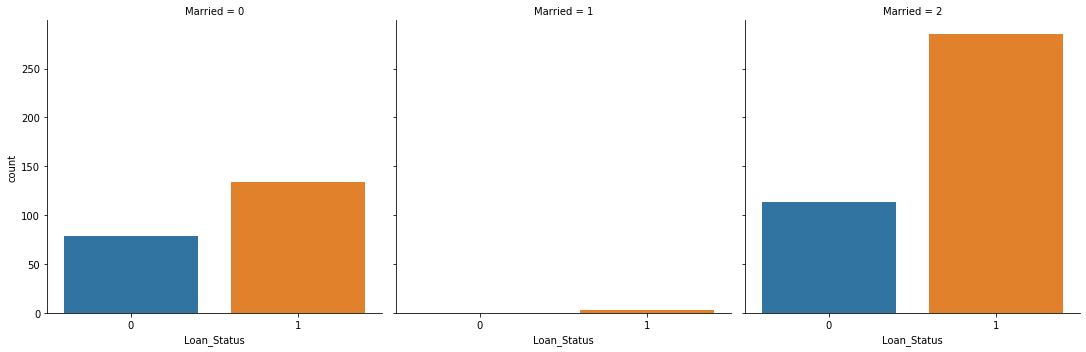

In [23]:
# build bar plots of loan prediction fraud dataset feature 'Loan_Status' splits over the feature 'Married'
sns.factorplot(x='Loan_Status', col='Married', kind='count', data=df);

In [25]:
import pandas as pd
X = df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y = df.Loan_Status        # y is a vector, hence we use dot to access 'label'

In [26]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(614, 12)


In [27]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(614,)


In [28]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.6818181818181818


In [31]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.5680727982747567

In [32]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [33]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.667391 (0.029247)
LDA: 0.667391 (0.032318)
KNN: 0.647826 (0.054824)
CART: 0.682609 (0.083179)
NB: 0.636957 (0.042433)
SVM: 0.689130 (0.009962)


In [34]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [35]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]
# scoring =[r2,neg_mean_squared_error,explained_variance]

sv=SVC()
score=cross_val_score(sv,X,y,cv=10,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=10)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.69354839 0.69354839 0.67741935 0.67741935 0.68852459 0.68852459
 0.68852459 0.68852459 0.68852459 0.68852459]
mean scores <built-in method mean of numpy.ndarray object at 0x00000228F87AAF80>
std 0.005313530063281029
Y prediction values
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

0.6872964169381107

In [36]:
# Decision Tree Classifier (criterion='gini')
# Decision Tree Classifier (criterion='entropy')
# gini and entropy

dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,X,y,cv=5,scoring='f1_macro')

print('f1_score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(dtc, X, y, cv=5)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

f1_score: [0.54779412 0.581202   0.68582375 0.72883598 0.59786801]
mean score: 0.628304771972872
stn deviation: 0.06788518283582352
Y prediction values
[1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0
 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 0 1 1 0 

array([[119,  73],
       [123, 299]], dtype=int64)

In [37]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=5,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=5)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

accuracy score: [0.60162602 0.67479675 0.62601626 0.60162602 0.55737705]
mean score: 0.6122884179661469
stn deviation: 0.038310251925922016
Y prediction values
[1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 

array([[ 32, 160],
       [ 78, 344]], dtype=int64)

In [38]:
svrbf=SVC(kernel='rbf') 
score=cross_val_score(svrbf,X,y,cv=5)
print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())
y_pred = cross_val_predict(svrbf, X, y, cv=5)
print('Y prediction values')
print(y_pred)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

accuracy score: [0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]
mean score: 0.6872984139677463
stn deviation: 0.0036872105184800976
Y prediction values
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1

In [39]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier

joblib_file = "joblib_svrbf.pkl"             # Save to file in the current working directory
joblib.dump(svrbf, joblib_file)
joblib_svrbf = joblib.load(joblib_file)      # Load from file

score=cross_val_score(svrbf,X,y,cv=5,scoring='accuracy')

print(score)

[0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]


Conclusion-Accuracy score & mean score is approx 69%